# Monte Carlo Simulation - Bootstrapping Method

The Investment Fund ABC currently has a __1,000,000 USD__ position in the __S&P 500 Index__. The Risk Manager of the Fund wants to estimate the __tail risk__ (extreme negative outcomes) of this position based on __historical data__ (and forecasts).<br><br>Simulate the __minimum loss__ over a __period of one quarter__ that will occur with __1%__ probability: __1% Value-at-Risk (VaR) of 1,000,000 USD over a period of one quarter (63 business days)__. Use the __bootstrapping method__.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, suppress= True)

In [2]:
sp_returns=np.loadtxt('C:/Users/aheed/Desktop/spreturns.csv', delimiter=",",usecols=1)

In [3]:
sp_returns

array([ 0.0012, -0.0061,  0.0022, ...,  0.0086, -0.0012,  0.0085])

In [5]:
sp_returns.size

3019

In [14]:
def simulation_bootstrap(daily_returns,days,initial,sims=10000,seed=123):
    days=int(days)
    
    np.random.seed(seed)
    ret=np.random.choice(daily_returns,size=days*sims,replace=True).reshape(sims,days)
    
    paths=(ret+1).cumprod(axis=1)*initial
    paths = np.hstack((np.ones(sims).reshape(sims, 1) * initial, paths))
    
    return paths
    

In [7]:
sims=1000000
initial=1000000
days=63

In [15]:
paths=simulation_bootstrap(sp_returns,days,initial,sims=sims)

In [16]:
final_boot=paths[:,-1]

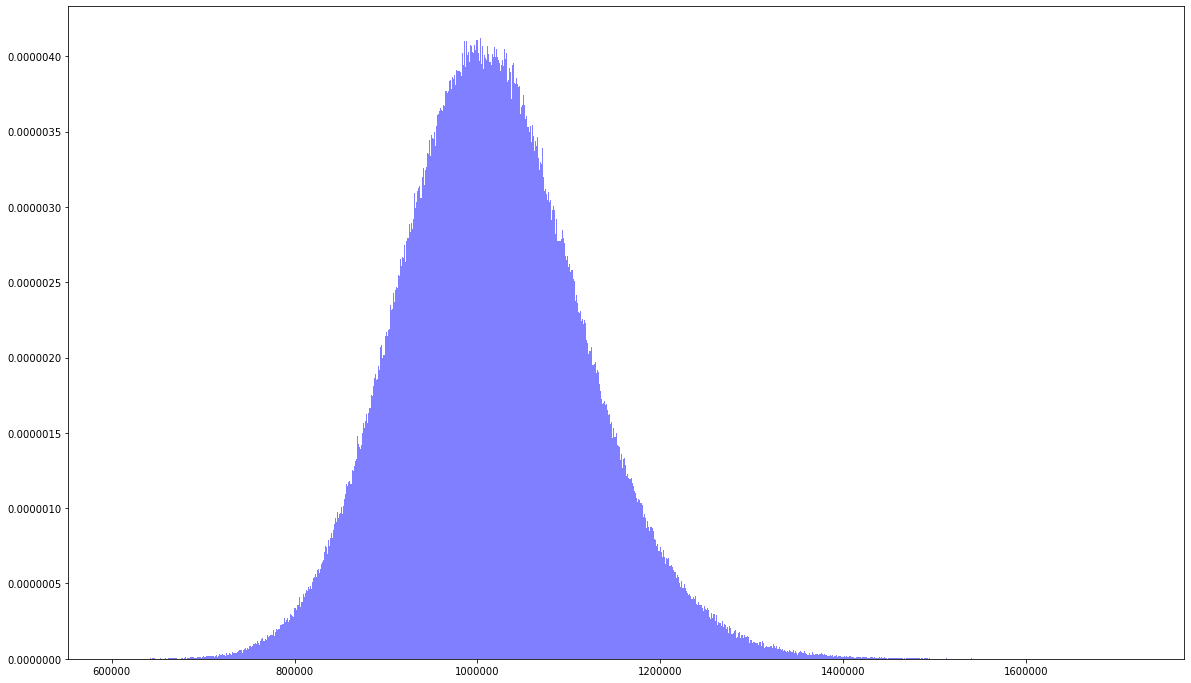

In [19]:
plt.figure(figsize = (20, 12))
plt.hist(final_boot, bins = 1000, density = True, alpha = 0.5, color = "b")
plt.ticklabel_format(style='plain')
plt.show()

In [20]:
final_boot.size

1000000

__ __

# __1% Value-at-Risk (VaR) of 1,000,000 USD over a period of one quarter__

In [27]:
def var_bootstrap(daily_returns,days,initial,prob,sims=10000,seed=123):
    days=int(days)
    
    np.random.seed(seed)
    ret=np.random.choice(daily_returns,size=days*sims,replace=True).reshape(sims,days)
    
    paths=(ret+1).prod(axis=1)*initial
    var=np.percentile(paths,prob)-initial
    
    return var

__ __

In [28]:
var_bootstrap(sp_returns,prob=1,days=63,initial=1000000,sims=1000000)

-202129.23942402937

In [30]:
var_b1=[]
for i in range(1,252+1):
    var_b1.append(-var_bootstrap(sp_returns,prob=1,days=i,initial=1000000))

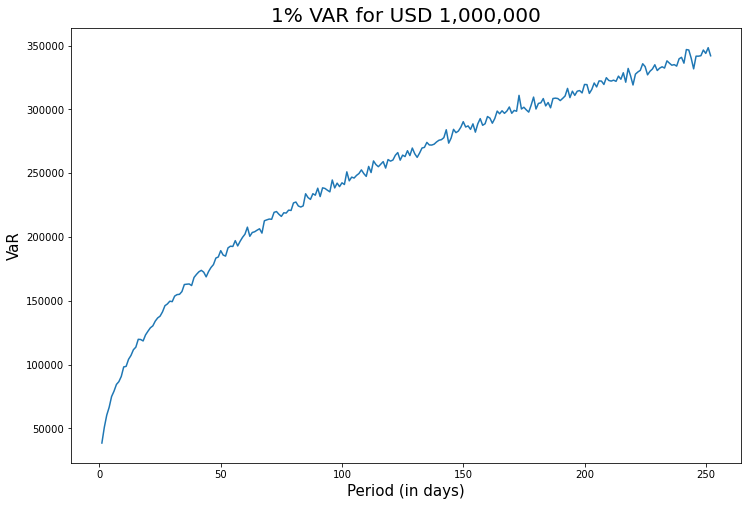

In [31]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, 252+1), var_b1)
plt.title("1% VAR for USD 1,000,000", fontsize = 20)
plt.xlabel("Period (in days)", fontsize = 15)
plt.ylabel("VaR", fontsize = 15)
plt.show()

In [34]:
var_b2=[]
for i in np.linspace(0.1,5,100):
    var_b2.append(-var_bootstrap(sp_returns,prob=i,days=63,initial=1000000))

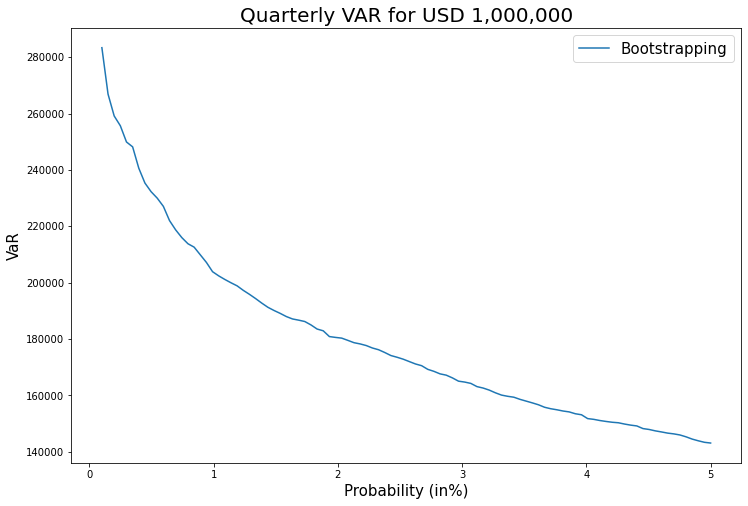

In [36]:
plt.figure(figsize = (12, 8))
#plt.plot(np.linspace(0.1, 5, 100),var_p2, label = "Parametric")
plt.plot(np.linspace(0.1, 5, 100),var_b2, label = "Bootstrapping")
plt.title("1% VAR for USD 1,000,000")
plt.title("Quarterly VAR for USD 1,000,000", fontsize = 20)
plt.xlabel("Probability (in%)", fontsize = 15)
plt.ylabel("VaR", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

BOOTSTRAPPING HAS HIGHER VaR THAN PARAMETRIC SINCE IT TAKES INTO ACCOUNT FAT TAILS AND DOES NOT ASSUME NORMALITY OF RETURN